<a href="https://colab.research.google.com/github/mwojcik01/CNN/blob/main/Projekt_SI_sie%C4%87_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#kopiowanie
import os
import numpy as np
import shutil

#przygotowanie modelu
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras import layers
from keras import optimizers
from tensorflow.keras import optimizers
#from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#wykres
import pandas as pd
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
!unzip -uq "/content/drive/My Drive/base_ddsm_cbm_2.zip" -d "./" # wypakowanie plików z Drive

In [ ]:
base_dir = './base_ddsm_cbm_2' # obliczanie ilości plików w każdym folderze
raw_no_of_files = {}
classes = ['ben_mal', 'nor']
for dir in classes:
    raw_no_of_files[dir] = len(os.listdir(os.path.join(base_dir, dir)))

raw_no_of_files.items()

dict_items([('ben_mal', 2003), ('nor', 9215)])

In [ ]:
#kasowanie plików
%%bash
pwd
rm -R images
ls

/content
base_ddsm_cbm_2
drive
sample_data


In [ ]:
data_dir = './images' # tworzenie katalogów: treningowego, walidacyjnego oraz testowego. 
                      #w każdym znajdują się 2 foldery: nor, ben_mal

if not os.path.exists(data_dir):
    os.mkdir(data_dir)

train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

train_nor_dir = os.path.join(train_dir, 'nor')
train_ben_mal_dir = os.path.join(train_dir, 'ben_mal')

valid_nor_dir = os.path.join(valid_dir, 'nor')
valid_ben_mal_dir = os.path.join(valid_dir, 'ben_mal')

test_nor_dir = os.path.join(test_dir, 'nor')
test_ben_mal_dir = os.path.join(test_dir, 'ben_mal')

for directory in (train_dir, valid_dir, test_dir):
    if not os.path.exists(directory):
        os.mkdir(directory)

dirs = [train_nor_dir, train_ben_mal_dir, valid_nor_dir, valid_ben_mal_dir, test_nor_dir, test_ben_mal_dir]

for dir in dirs:
    if not os.path.exists(dir):
        os.mkdir(dir)

In [ ]:
#kopiowanie
nor_fnames = os.listdir(os.path.join(base_dir, 'nor'))
ben_mal_fnames = os.listdir(os.path.join(base_dir, 'ben_mal'))


nor_fnames = [fname for fname in nor_fnames if fname.split('.')[1].lower() in ['png']]
ben_mal_fnames = [fname for fname in ben_mal_fnames if fname.split('.')[1].lower() in ['png']]

In [ ]:
size = min(len(nor_fnames), len(ben_mal_fnames)) # ustalanie ilości plików w folderze 

train_size = int(np.floor(0.7 * size))
valid_size = int(np.floor(0.2 * size))
test_size = size - train_size - valid_size

train_idx = train_size
valid_idx = train_size + valid_size
test_idx = train_size + valid_size + test_size

In [ ]:
for i, fname in enumerate(nor_fnames): # proces kopiowania plików
    if i <= train_idx:
        src = os.path.join(base_dir, 'nor', fname)
        dst = os.path.join(train_nor_dir, fname)
        shutil.copyfile(src, dst)
    elif train_idx < i <= valid_idx:
        src = os.path.join(base_dir, 'nor', fname)
        dst = os.path.join(valid_nor_dir, fname)
        shutil.copyfile(src, dst) 
    elif valid_idx < i < test_idx:
        src = os.path.join(base_dir, 'nor', fname)
        dst = os.path.join(test_nor_dir, fname)
        shutil.copyfile(src, dst) 

for i, fname in enumerate(ben_mal_fnames):
    if i <= train_idx:
        src = os.path.join(base_dir, 'ben_mal', fname)
        dst = os.path.join(train_ben_mal_dir, fname)
        shutil.copyfile(src, dst)
    elif train_idx < i <= valid_idx:
        src = os.path.join(base_dir, 'ben_mal', fname)
        dst = os.path.join(valid_ben_mal_dir, fname)
        shutil.copyfile(src, dst) 
    elif valid_idx < i < test_idx:
        src = os.path.join(base_dir, 'ben_mal', fname)
        dst = os.path.join(test_ben_mal_dir, fname)
        shutil.copyfile(src, dst)

In [ ]:
# sprawdzanie ilości plików w folderach
print('nor - trening', len(os.listdir(train_nor_dir))) 
print('nor - walidacja', len(os.listdir(valid_nor_dir)))
print('nor - test', len(os.listdir(test_nor_dir)))

print('ben_mal - trening', len(os.listdir(train_ben_mal_dir)))
print('ben_mal - walidacja', len(os.listdir(valid_ben_mal_dir)))
print('ben_mal - test', len(os.listdir(test_ben_mal_dir)))

nor - trening 1403
nor - walidacja 400
nor - test 200
ben_mal - trening 1403
ben_mal - walidacja 400
ben_mal - test 200


In [ ]:
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,    
                 input_shape=(128, 128, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_12 (Flatten)        (None, 8192)              0         
                                                                 
 dense_24 (Dense)            (None, 256)               2097408   
                                                                 
 dense_25 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#zamrożenie wag w celu zapobiegnięcia aktualizacji 
print('Liczba wag poddawanych trenowaniu przed zamrożeniem bazy:', len(model.trainable_weights))
conv_base.trainable = False
print('Liczba wag poddawanych trenowaniu po zamrożeniu bazy', len(model.trainable_weights))

Liczba wag poddawanych trenowaniu przed zamrożeniem bazy: 30
Liczba wag poddawanych trenowaniu po zamrożeniu bazy 4


In [ ]:


from keras.preprocessing.image import ImageDataGenerator



train_datagen = ImageDataGenerator(rescale=1./255.,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)
valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = test_datagen.flow_from_directory(train_dir,
                                                   target_size=(128, 128),
                                                   batch_size=20,
                                                   class_mode='binary')
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                   target_size=(128, 128),
                                                   batch_size=20,
                                                   class_mode='binary')



Found 2806 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
batch_size = 16
steps_per_epoch = train_size // batch_size
validation_steps = valid_size // batch_size

In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(train_generator,
                             steps_per_epoch=steps_per_epoch,
                             epochs=30,
                             validation_data=valid_generator,
                             validation_steps=validation_steps
                             )

Epoch 1/30
87/87 [==============================] - 6s 54ms/step - loss: 0.6830 - accuracy: 0.5828 - val_loss: 0.6641 - val_accuracy: 0.6300
Epoch 2/30
87/87 [==============================] - 4s 45ms/step - loss: 0.6539 - accuracy: 0.6518 - val_loss: 0.6325 - val_accuracy: 0.7000
Epoch 3/30
87/87 [==============================] - 4s 46ms/step - loss: 0.6279 - accuracy: 0.7051 - val_loss: 0.6094 - val_accuracy: 0.7260
Epoch 4/30
87/87 [==============================] - 4s 46ms/step - loss: 0.6133 - accuracy: 0.7190 - val_loss: 0.5936 - val_accuracy: 0.7360
Epoch 5/30
87/87 [==============================] - 4s 46ms/step - loss: 0.5948 - accuracy: 0.7312 - val_loss: 0.5738 - val_accuracy: 0.7660
Epoch 6/30
87/87 [==============================] - 4s 47ms/step - loss: 0.5817 - accuracy: 0.7399 - val_loss: 0.5776 - val_accuracy: 0.7320
Epoch 7/30
87/87 [==============================] - 4s 47ms/step - loss: 0.5629 - accuracy: 0.7638 - val_loss: 0.5561 - val_accuracy: 0.7600
Epoch 8/30
87

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255.)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(128, 128),
                                                 batch_size=8,
                                                 class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Dokładność testowania:', test_acc)

Found 400 images belonging to 2 classes.
50/50 [==============================] - 1s 19ms/step - loss: 0.4545 - accuracy: 0.7875
Dokładność testowania: 0.7875000238418579


In [ ]:
#dostrajanie - poprawa działania modelu
conv_base = VGG16(weights='imagenet',
                 include_top=False,    
                 input_shape=(128, 128, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
conv_base.trainable = True

def print_layers(model):
    for layer in model.layers:
        print('layer_name: {:12}, trainable: {}'.format(layer.name, layer.trainable))
        
print_layers(conv_base)

layer_name: input_14    , trainable: True
layer_name: block1_conv1, trainable: True
layer_name: block1_conv2, trainable: True
layer_name: block1_pool , trainable: True
layer_name: block2_conv1, trainable: True
layer_name: block2_conv2, trainable: True
layer_name: block2_pool , trainable: True
layer_name: block3_conv1, trainable: True
layer_name: block3_conv2, trainable: True
layer_name: block3_conv3, trainable: True
layer_name: block3_pool , trainable: True
layer_name: block4_conv1, trainable: True
layer_name: block4_conv2, trainable: True
layer_name: block4_conv3, trainable: True
layer_name: block4_pool , trainable: True
layer_name: block5_conv1, trainable: True
layer_name: block5_conv2, trainable: True
layer_name: block5_conv3, trainable: True
layer_name: block5_pool , trainable: True


In [ ]:
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
print_layers(conv_base)

layer_name: input_14    , trainable: False
layer_name: block1_conv1, trainable: False
layer_name: block1_conv2, trainable: False
layer_name: block1_pool , trainable: False
layer_name: block2_conv1, trainable: False
layer_name: block2_conv2, trainable: False
layer_name: block2_pool , trainable: False
layer_name: block3_conv1, trainable: False
layer_name: block3_conv2, trainable: False
layer_name: block3_conv3, trainable: False
layer_name: block3_pool , trainable: False
layer_name: block4_conv1, trainable: False
layer_name: block4_conv2, trainable: False
layer_name: block4_conv3, trainable: False
layer_name: block4_pool , trainable: False
layer_name: block5_conv1, trainable: True
layer_name: block5_conv2, trainable: True
layer_name: block5_conv3, trainable: True
layer_name: block5_pool , trainable: True


In [ ]:


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()



Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_13 (Flatten)        (None, 8192)              0         
                                                                 
 dense_26 (Dense)            (None, 256)               2097408   
                                                                 
 dense_27 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
history = model.fit(train_generator,
                             steps_per_epoch=steps_per_epoch,
                             epochs=30,
                             validation_data=valid_generator,
                             validation_steps=validation_steps)

Epoch 1/30
87/87 [==============================] - 6s 56ms/step - loss: 0.6394 - accuracy: 0.6535 - val_loss: 0.5639 - val_accuracy: 0.7520
Epoch 2/30
87/87 [==============================] - 5s 54ms/step - loss: 0.4794 - accuracy: 0.7926 - val_loss: 0.4210 - val_accuracy: 0.8200
Epoch 3/30
87/87 [==============================] - 5s 54ms/step - loss: 0.3679 - accuracy: 0.8356 - val_loss: 0.3611 - val_accuracy: 0.8360
Epoch 4/30
87/87 [==============================] - 5s 54ms/step - loss: 0.3242 - accuracy: 0.8650 - val_loss: 0.3433 - val_accuracy: 0.8440
Epoch 5/30
87/87 [==============================] - 5s 54ms/step - loss: 0.2922 - accuracy: 0.8801 - val_loss: 0.3120 - val_accuracy: 0.8460
Epoch 6/30
87/87 [==============================] - 5s 54ms/step - loss: 0.2628 - accuracy: 0.8986 - val_loss: 0.3221 - val_accuracy: 0.8500
Epoch 7/30
87/87 [==============================] - 5s 54ms/step - loss: 0.2486 - accuracy: 0.9056 - val_loss: 0.3556 - val_accuracy: 0.8360
Epoch 8/30
87

In [ ]:
def plot_hist(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['accuracy'], name='accuracy', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_accuracy'], name='val_accuracy', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='Accuracy vs. Val Accuracy', xaxis_title='Epoki', yaxis_title='Accuracy', yaxis_type='log')
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['loss'], name='loss', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_loss'], name='val_loss', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='Loss vs. Val Loss', xaxis_title='Epoki', yaxis_title='Loss', yaxis_type='log')
    fig.show()

plot_hist(history)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255.)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(128, 128),
                                                 batch_size=8,
                                                 class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Dokładność testowania:', test_acc)

Found 400 images belonging to 2 classes.
50/50 [==============================] - 1s 19ms/step - loss: 0.4096 - accuracy: 0.8700
Dokładność testowania: 0.8700000047683716


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255.)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

y_prob = model.predict(test_generator, test_generator.samples)
y_prob = y_prob.ravel()
y_prob

Found 400 images belonging to 2 classes.


array([3.35767680e-07, 9.45665181e-01, 6.16921243e-05, 9.04757261e-01,
       1.60542149e-05, 5.53633757e-02, 6.04798365e-03, 1.82471015e-02,
       9.99827743e-01, 5.67348003e-01, 1.19616510e-02, 3.65812011e-05,
       1.69098787e-02, 4.16243225e-01, 3.68253320e-01, 1.27156536e-05,
       9.32136118e-01, 6.48306857e-04, 4.00569111e-01, 9.65807378e-01,
       2.12113155e-04, 1.09298048e-09, 3.09335277e-03, 3.77369730e-07,
       4.51470760e-06, 1.02158292e-05, 3.35207382e-08, 2.91373998e-01,
       9.60329711e-01, 2.56725382e-02, 1.61927499e-04, 8.00090788e-07,
       3.97148579e-02, 7.94213520e-06, 6.09262361e-06, 3.06144372e-08,
       1.34319305e-01, 1.68060162e-03, 9.49515146e-04, 9.40845430e-01,
       9.76058066e-01, 1.56382812e-04, 3.82600632e-03, 4.33011912e-02,
       1.60276045e-06, 3.53195787e-06, 1.01153068e-01, 8.82568777e-01,
       5.90054900e-04, 1.67833801e-04, 1.07705302e-03, 9.36131030e-08,
       9.65713680e-01, 1.78051479e-02, 1.10751971e-05, 7.87761211e-02,
      

In [ ]:
predictions  = pd.DataFrame({'y_prob': y_prob})
predictions['class'] = predictions['y_prob'].apply(lambda x: 1 if x > 0.5 else 0)
predictions

,y_prob,class
0,3.357677e-07,0
1,9.456652e-01,1
2,6.169212e-05,0
3,9.047573e-01,1
4,1.605421e-05,0
...,...,...
395,9.671702e-01,1
396,9.996717e-01,1
397,1.133443e-01,0
398,9.999965e-01,1


In [ ]:
y_true = test_generator.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
y_pred = predictions['class'].values
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
test_generator.class_indices

{'ben_mal': 0, 'nor': 1}

In [ ]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[170,  30],
       [ 22, 178]])

In [ ]:
def plot_confusion_matrix(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=classes, index=classes[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=500, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [ ]:
from sklearn import metrics

print('Accuracy:', np.round(metrics.accuracy_score(y_true, y_pred),2))

Accuracy: 0.87


In [ ]:
model.evaluate(test_generator)

400/400 [==============================] - 3s 7ms/step - loss: 0.4096 - accuracy: 0.8700


[0.40960177779197693, 0.8700000047683716]

In [ ]:
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size

In [ ]:
test_generator.reset()
preds = model.predict(test_generator, verbose = 1)

400/400 [==============================] - 2s 5ms/step


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, _ = roc_curve(test_generator.classes, preds)


roc_auc = auc(fpr,tpr)

In [ ]:
print('AUC:', roc_auc )

AUC: 0.9423250000000001


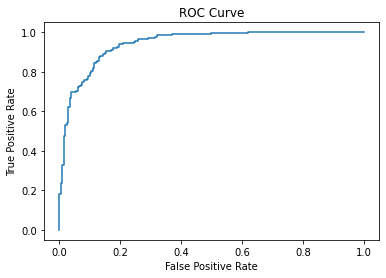

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)

plt.title("ROC Curve")

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.show()